In [4]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
from datetime import datetime       #Datetime
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [5]:
pd.set_option("display.max_rows",4)#Cantidad de filas a mostrar
pd.set_option("display.max_columns",13)#Cantidad de columnas a mostrar

`CICLO VIA`

In [6]:
# CSV= "/content/sample_data/CicloVia.csv"
CSV= "CicloVia.csv"
dfCicloVia = pd.read_csv(CSV, sep=",")
dfCicloVia

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,44,4357,442,01/02/2020,0:00:38,116,01/02/2020,0:35:17
1,M,22,12083,66,01/02/2020,0:00:53,37,01/02/2020,0:06:23
...,...,...,...,...,...,...,...,...,...
686325,M,48,8495,27,28/02/2020,23:59:54,119,29/02/2020,0:06:44
686326,M,33,7992,137,28/02/2020,23:59:56,154,29/02/2020,0:10:15


In [7]:
dfCicloVia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686327 entries, 0 to 686326
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Genero_Usuario         686327 non-null  object
 1   Edad_Usuario           686327 non-null  int64 
 2   Bici                   686327 non-null  int64 
 3   Ciclo_Estacion_Retiro  686327 non-null  int64 
 4   Fecha_Retiro           686327 non-null  object
 5   Hora_Retiro            686327 non-null  object
 6   Ciclo_Estacion_Arribo  686327 non-null  int64 
 7   Fecha_Arribo           686327 non-null  object
 8   Hora_Arribo            686327 non-null  object
dtypes: int64(4), object(5)
memory usage: 47.1+ MB


C:\Users\yahoo\AppData\Local\Temp\ipykernel_16340\1970047788.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_diarios['horas'] = viajes_diarios['fecha_hora'].dt.floor('H')


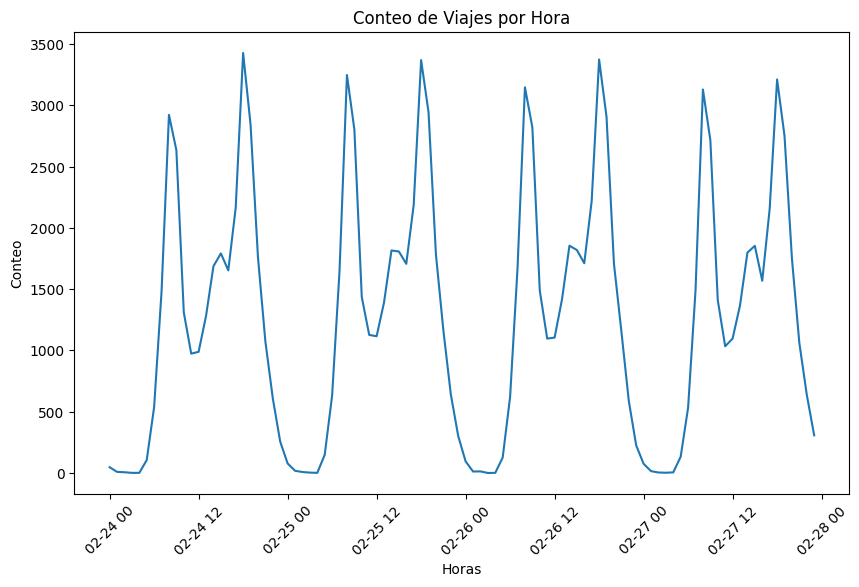

,horas,conteo
0,2020-02-24 00:00:00,47.0
1,2020-02-24 01:00:00,9.0
...,...,...
3,2020-02-24 03:00:00,1.0
4,2020-02-24 04:00:00,1.0


In [9]:
# Convertir la columna "fecha_hora" en formato datetime
# dfCicloVia['fecha_hora'] = pd.to_datetime(dfCicloVia['Fecha_Arribo'] + ' ' + dfCicloVia['Hora_Arribo'])
dfCicloVia['fecha_hora'] = pd.to_datetime(dfCicloVia['Fecha_Arribo'] + ' ' + dfCicloVia['Hora_Arribo'], format='%d/%m/%Y %H:%M:%S')

dfCicloVia['fecha_hora'] = pd.to_datetime(dfCicloVia['fecha_hora'])

# Filtrar los datos por fechas específicas
fecha_inicio = pd.to_datetime('2020-02-24')
fecha_fin = pd.to_datetime('2020-02-28')
viajes_diarios = dfCicloVia[(dfCicloVia['fecha_hora'] >= fecha_inicio) & (dfCicloVia['fecha_hora'] <= fecha_fin)]

# Agrupar por hora y contar los viajes
viajes_diarios['horas'] = viajes_diarios['fecha_hora'].dt.floor('H')
conteo_viajes = viajes_diarios.groupby('horas').size().reset_index(name='conteo')

# Crear un DataFrame con todas las horas completas entre la hora mínima y máxima
horas_completas = pd.DataFrame({'horas': pd.date_range(viajes_diarios['horas'].min(), viajes_diarios['horas'].max(), freq='H')})

# Agrupar las horas completas y combinar con los datos de viajes diarios
viajes_hora = horas_completas.merge(conteo_viajes, how='left', on='horas')
viajes_hora['conteo'] = viajes_hora['conteo'].fillna(0)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(viajes_hora['horas'], viajes_hora['conteo'])
plt.xlabel('Horas')
plt.ylabel('Conteo')
plt.title('Conteo de Viajes por Hora')
plt.xticks(rotation=45)
plt.show()

# Ver los datos de viajes_diarios
viajes_diarios.head()

# Ver los datos de horas_completas
horas_completas.head()

# Ver los datos de viajes_hora
viajes_hora.head()


`GOOGLE PLAY`

In [ ]:
# CSV= "/content/sample_data/Google-Playstore.csv"
CSV= "Google-Playstore.csv"
dfGooglePlay = pd.read_csv(CSV, sep=",")
dfGooglePlay

<ipython-input-16-33f78809c0fd>:2: DtypeWarning: Columns (20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dfGooglePlay = pd.read_csv(CSV, sep=",")


,App Name,App Id,Category,Rating,Rating Count,Installs,...,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,...,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",...,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860416,Flying Squirrel Sound Collections ~ Sclip.app,app.sclip.flying_squirrel,Music & Audio,0.0,0.0,500+,...,Teen,http://sclip.app/privacy.html,True,False,False,2021-06-16 10:08:53
860417,TAGTHAi,com.thaidigitalplatform.tagthai,Travel & Local,4.2,274.0,"50,000+",...,Everyone,http://,NaN,NaN,NaN,NaN


In [ ]:
dfGooglePlay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860418 entries, 0 to 860417
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           860417 non-null  object 
 1   App Id             860418 non-null  object 
 2   Category           860418 non-null  object 
 3   Rating             851945 non-null  float64
 4   Rating Count       851945 non-null  float64
 5   Installs           860379 non-null  object 
 6   Minimum Installs   860379 non-null  float64
 7   Maximum Installs   860418 non-null  int64  
 8   Free               860418 non-null  bool   
 9   Price              860418 non-null  float64
 10  Currency           860363 non-null  object 
 11  Size               860343 non-null  object 
 12  Minimum Android    858038 non-null  object 
 13  Developer Id       860410 non-null  object 
 14  Developer Website  577158 non-null  object 
 15  Developer Email    860411 non-null  object 
 16  Re

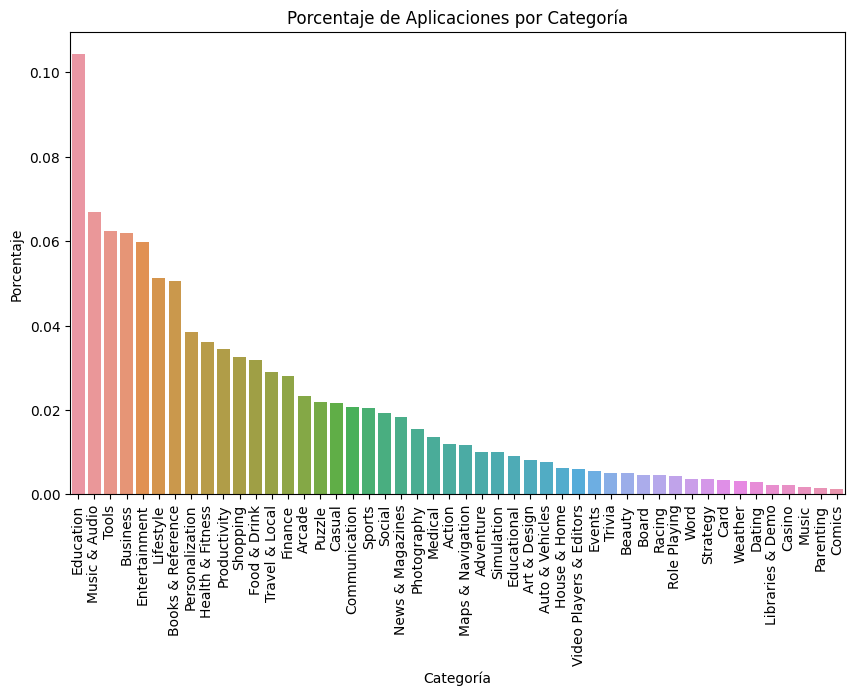

In [ ]:
x = 1000  # Valor de ejemplo, debes asignar el valor deseado a la variable x

conteo = int(x)

str_conteo = str(round(4) * 100) + "x"

apps = dfGooglePlay.groupby('Category').size().reset_index(name='n') \
    .assign(perc=lambda df: df['n'] / df['n'].sum(),
            perc_acum=lambda df: df['perc'].cumsum()) \
    .sort_values('n', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=apps, x='Category', y='perc')
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Aplicaciones por Categoría')
plt.show()

